In [2]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

In [3]:
hdu = fits.open('HE0232-0900.wo_abosrption.fits')
#hdu.info()
hdu.info()

FileNotFoundError: [Errno 2] No such file or directory: 'HE0232-0900.wo_abosrption.fits'

In [15]:
qso_data = hdu[0].data
qso_error = hdu[1].data
qso_header = hdu[0].header
qso_header

SIMPLE  =                    T                                                  
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  159 / length of data axis 1                          
NAXIS2  =                  158 / length of data axis 2                          
NAXIS3  =                 3681 / length of data axis 3                          
EXTEND  =                    T                                                  
XTENSION= 'IMAGE   '           / IMAGE extension                                
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
EXTNAME = 'DATA    '           / This extension contains data values            
HDUCLASS= 'ESO     '           / class name (ESO format)                        
HDUDOC  = 'DICD    '        

In [624]:
mini_cube = qso_data[:,125:183,88:146]
#mini_cube = qso_data
mini_cube

array([[[  3.08584160e-04,   1.13948190e-03,   6.22357801e-03, ...,
           7.71480240e-03,  -7.96147902e-03,   1.92647253e-03],
        [  1.30258757e-03,  -1.48040371e-03,  -2.21765158e-03, ...,
           6.55189855e-03,  -3.96348350e-03,  -3.08093685e-03],
        [  3.22937663e-03,   2.00449978e-03,  -4.24047513e-03, ...,
           2.52007414e-03,   5.31106396e-03,  -3.29842581e-03],
        ..., 
        [  1.98355014e-03,   3.74771887e-03,  -4.12673457e-04, ...,
          -4.91669215e-03,  -3.09436861e-03,   5.70931844e-03],
        [  4.27019037e-03,   4.13185125e-03,   1.41253707e-03, ...,
           1.25416147e-03,   1.09315908e-03,   7.19439518e-03],
        [  1.67935225e-03,   2.56607961e-03,  -1.66497508e-03, ...,
          -6.84306317e-04,  -6.43028819e-04,   6.20866381e-03]],

       [[ -6.03846092e-06,   8.17155058e-04,   4.03918792e-03, ...,
           1.49137399e-03,  -1.65789714e-03,  -1.50752807e-04],
        [  2.26662378e-03,   1.25584961e-03,   5.95943711e-0

In [625]:
image1=mini_cube[0,:,:]


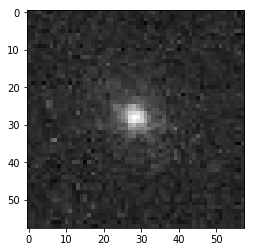

In [626]:
plt.imshow(image1,cmap='gray')
plt.show()

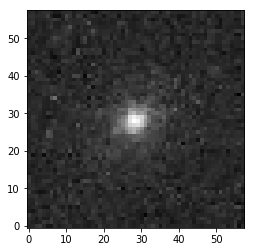

In [627]:
plt.imshow(image1,cmap='gray',origin='lower',interpolation='nearest')
plt.show()

In [628]:
spectrum1 = mini_cube[:, 7, 5]
spectrum1

array([ 0.00138691,  0.0022626 ,  0.00372298, ..., -0.00298147,
        0.00198879,  0.00274139], dtype=float32)

In [16]:
plt.plot(spectrum1,'k-')
plt.show()

NameError: name 'spectrum1' is not defined

In [631]:
qso_header['CRPIX1'] = qso_header['CRPIX1'] - 88
qso_header['CRPIX2'] = qso_header['CRPIX2'] - 125
new_hdu = fits.PrimaryHDU(data=mini_cube,header=qso_header)
new_hdu.writeto('minicube2.fits')

In [632]:
hdu = fits.open('minicube2.fits')
mini_data = hdu[0].data
mini_header = hdu[0].header
wavstart = mini_header['CRVAL3']
wavint = mini_header['CD3_3']
wave = np.arange(wavstart,(wavstart+(wavint*mini_data.shape[0])),wavint)

In [633]:
wavstart = mini_header['CRVAL3']
wavint = mini_header['CD3_3']
mini_data.shape

(3681, 58, 58)

In [634]:
z =0.053197 
k = 1+z
c = 3*(10**10)
5007*k

5273.357379

In [635]:
w80 = np.zeros((mini_data.shape[1],mini_data.shape[2]),dtype=np.float32)
vel_diff = np.zeros((mini_data.shape[1],mini_data.shape[2]),dtype=np.float32)
flux_narrow = np.zeros((mini_data.shape[1],mini_data.shape[2]),dtype=np.float32)
flux_broad = np.zeros((mini_data.shape[1],mini_data.shape[2]),dtype=np.float32)
flux_total = np.zeros((mini_data.shape[1],mini_data.shape[2]),dtype=np.float32)
v5 = np.zeros((mini_data.shape[1],mini_data.shape[2]),dtype=np.float32)

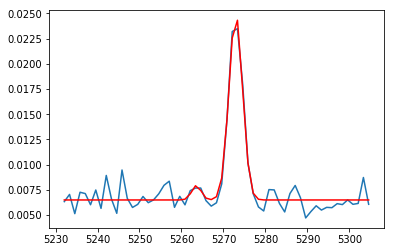

('w80 is', 176.42076)
('v5 is', 2.3)
59249.1
('velocity shift is', 507.11716)


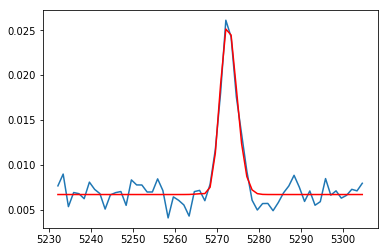

('w80 is', 233.50322)
('v5 is', 2.52)
59249.1
('velocity shift is', 120.54969)


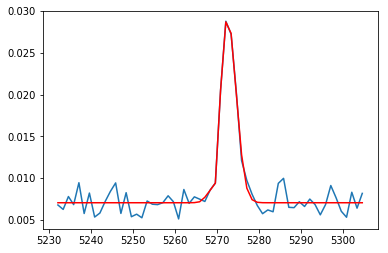

('w80 is', 209.72612)
('v5 is', 2.1400001)
59249.1
('velocity shift is', 146.75986)


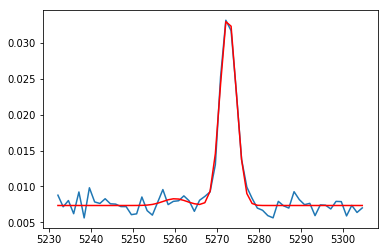

('w80 is', 244.77495)
('v5 is', 9.1599998)
59249.1
('velocity shift is', 686.29419)


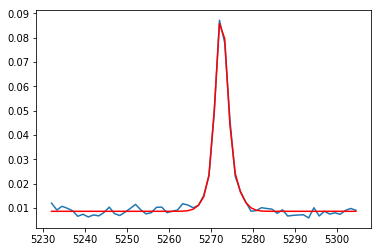

('w80 is', 266.85873)
('v5 is', 3.2)
59249.1
('velocity shift is', -24.830999)


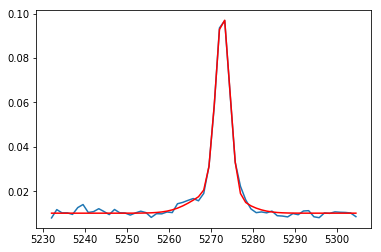

('w80 is', 362.03903)
('v5 is', 6.8400002)
59249.1
('velocity shift is', 74.884415)


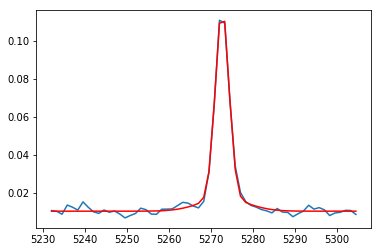

('w80 is', 253.89149)
('v5 is', 4.1599998)
59249.1
('velocity shift is', -16.771841)


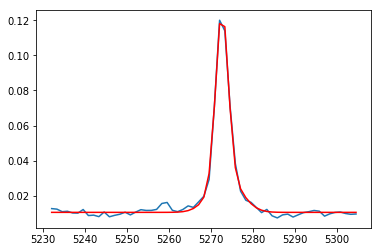

('w80 is', 287.35913)
('v5 is', 3.4000001)
59249.1
('velocity shift is', -45.524132)


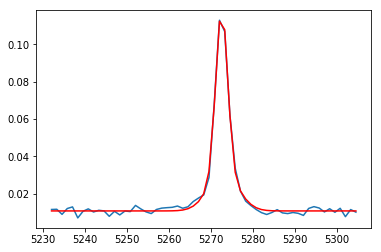

('w80 is', 284.14517)
('v5 is', 3.8)
59249.1
('velocity shift is', -20.539486)


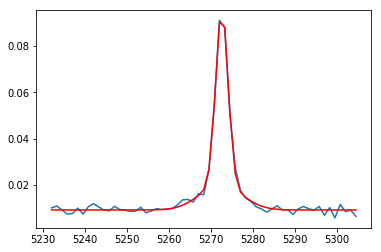

('w80 is', 366.29736)
('v5 is', 5.9000001)
59249.1
('velocity shift is', 14.843113)


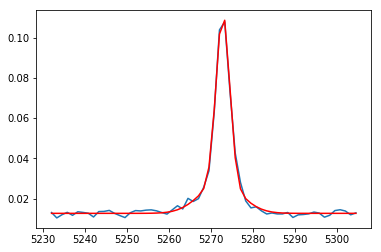

('w80 is', 373.86859)
('v5 is', 6.1599998)
59249.1
('velocity shift is', 33.513874)


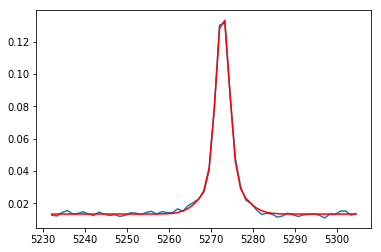

('w80 is', 338.17603)
('v5 is', 4.96)
59249.1
('velocity shift is', -0.83503556)


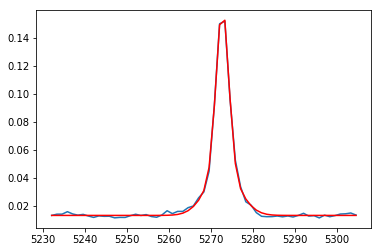

('w80 is', 339.25687)
('v5 is', 4.7199998)
59249.1
('velocity shift is', -3.0175786)


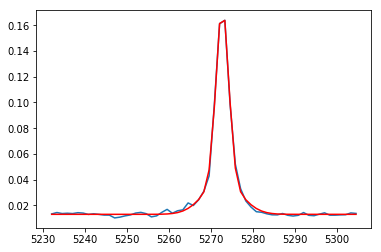

('w80 is', 340.34531)
('v5 is', 5.1199999)
59249.1
('velocity shift is', 2.9647536)


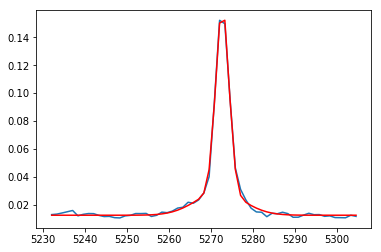

('w80 is', 386.85101)
('v5 is', 6.8600001)
59249.1
('velocity shift is', 36.934124)


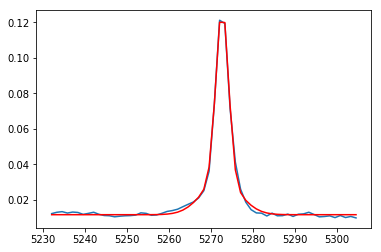

('w80 is', 365.21954)
('v5 is', 5.6399999)
59249.1
('velocity shift is', 19.75079)


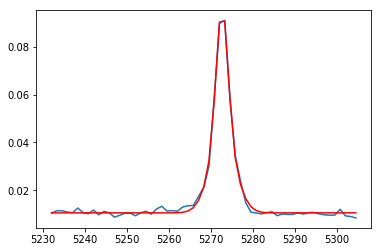

('w80 is', 311.16483)
('v5 is', 3.9400001)
59249.1
('velocity shift is', -6.3107376)


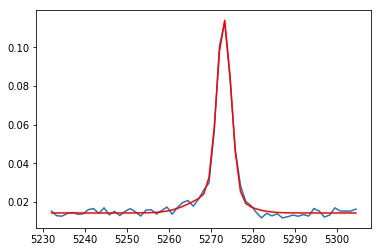

('w80 is', 352.32532)
('v5 is', 6.98)
59249.1
('velocity shift is', 102.19059)


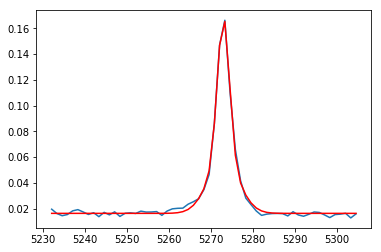

('w80 is', 358.69443)
('v5 is', 4.8000002)
59249.1
('velocity shift is', 1.542291)


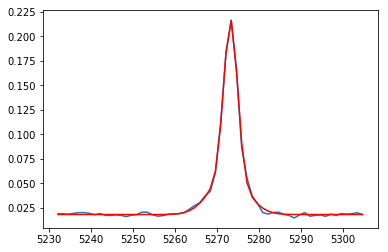

('w80 is', 363.03922)
('v5 is', 5.5799999)
59249.1
('velocity shift is', 30.7225)


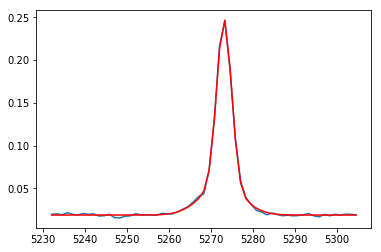

('w80 is', 357.64664)
('v5 is', 5.9200001)
59249.1
('velocity shift is', 36.739319)


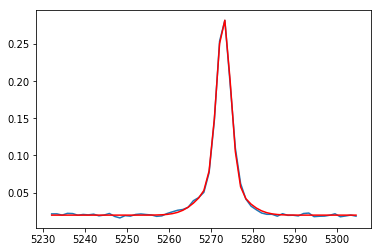

('w80 is', 369.52631)
('v5 is', 5.8400002)
59249.1
('velocity shift is', 25.553608)


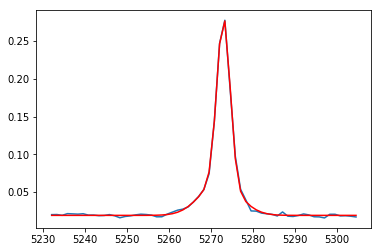

('w80 is', 372.80112)
('v5 is', 6.1599998)
59249.1
('velocity shift is', 49.961403)


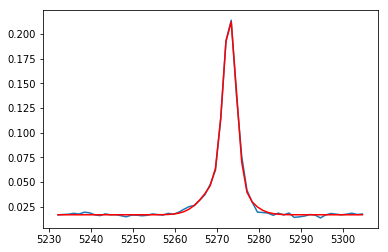

('w80 is', 379.30426)
('v5 is', 6.2199998)
59249.1
('velocity shift is', 62.676037)


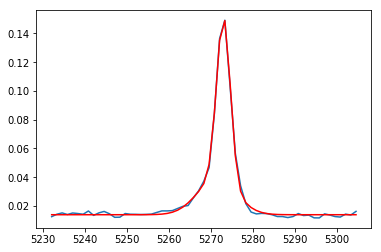

('w80 is', 392.30478)
('v5 is', 6.7199998)
59249.1
('velocity shift is', 88.740341)


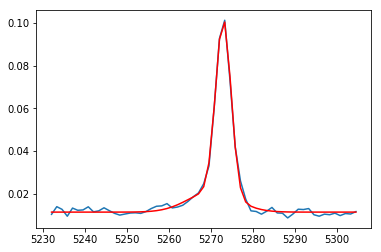

('w80 is', 408.59683)
('v5 is', 8.0)
59249.1
('velocity shift is', 144.81729)


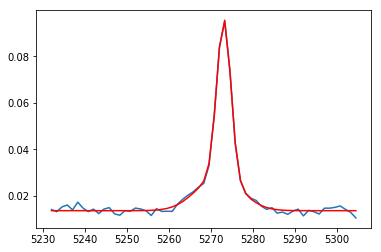

('w80 is', 448.46271)
('v5 is', 7.4200001)
59249.1
('velocity shift is', 69.666298)


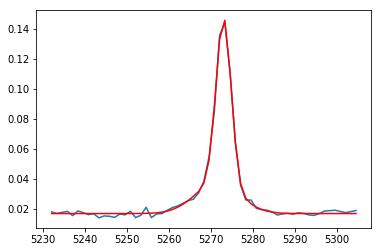

('w80 is', 416.0722)
('v5 is', 7.2600002)
59249.1
('velocity shift is', 84.155922)


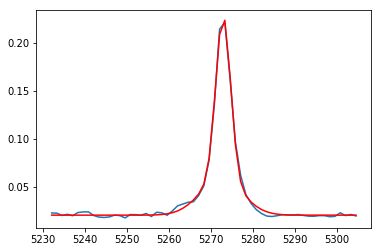

('w80 is', 400.87064)
('v5 is', 6.2600002)
59249.1
('velocity shift is', 27.891167)


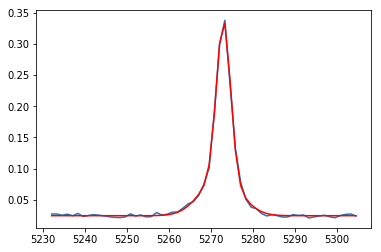

('w80 is', 395.48093)
('v5 is', 6.1799998)
59249.1
('velocity shift is', 41.415718)


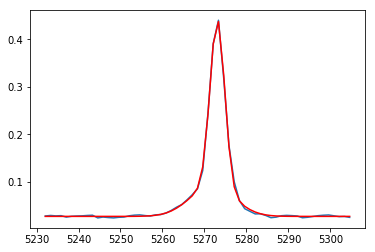

('w80 is', 406.32275)
('v5 is', 6.98)
59249.1
('velocity shift is', 69.647034)


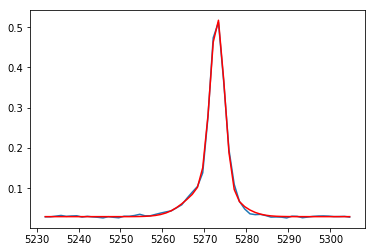

('w80 is', 422.5455)
('v5 is', 7.2399998)
59249.1
('velocity shift is', 76.642456)


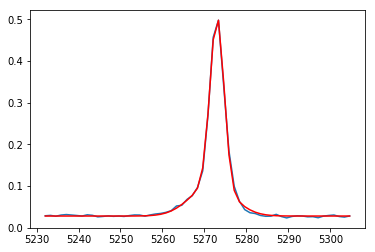

('w80 is', 400.92419)
('v5 is', 6.9000001)
59249.1
('velocity shift is', 68.788345)


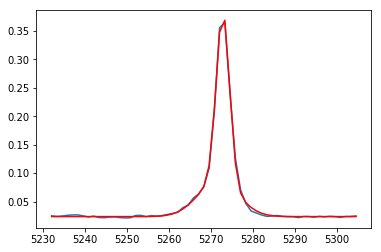

('w80 is', 399.84387)
('v5 is', 6.6599998)
59249.1
('velocity shift is', 62.575268)


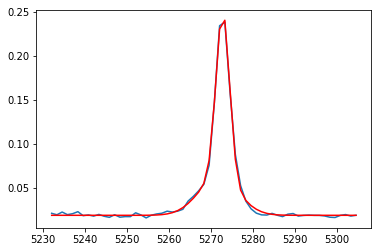

('w80 is', 402.00128)
('v5 is', 6.5799999)
59249.1
('velocity shift is', 58.17783)


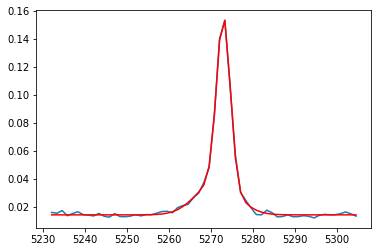

('w80 is', 402.03571)
('v5 is', 7.02)
59249.1
('velocity shift is', 91.061775)


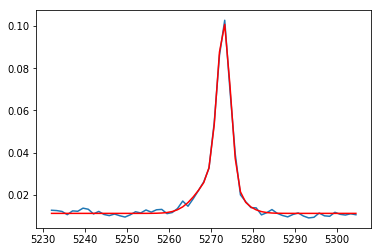

('w80 is', 390.13998)
('v5 is', 6.6199999)
59249.1
('velocity shift is', 91.812141)


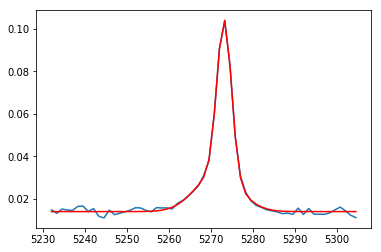

('w80 is', 460.3775)
('v5 is', 7.6599998)
59249.1
('velocity shift is', 91.557617)


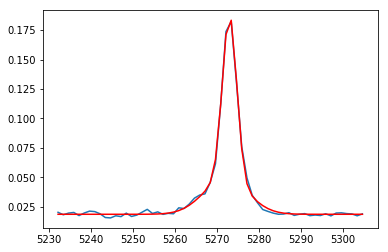

('w80 is', 438.72229)
('v5 is', 7.0599999)
59249.1
('velocity shift is', 49.36924)


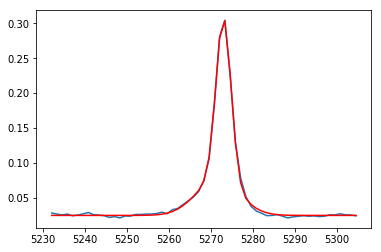

('w80 is', 427.94934)
('v5 is', 7.1399999)
59249.1
('velocity shift is', 76.536476)


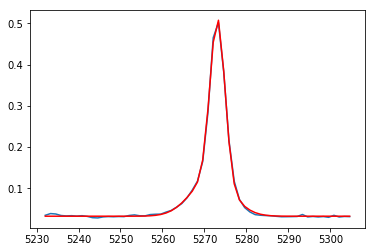

('w80 is', 414.98358)
('v5 is', 6.9000001)
59249.1
('velocity shift is', 82.273941)


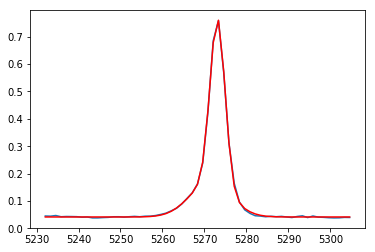

('w80 is', 407.43817)
('v5 is', 7.0)
59249.1
('velocity shift is', 96.008774)


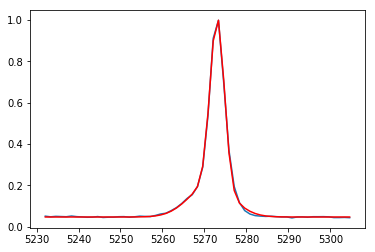

('w80 is', 413.91626)
('v5 is', 7.1799998)
59249.1
('velocity shift is', 87.382622)


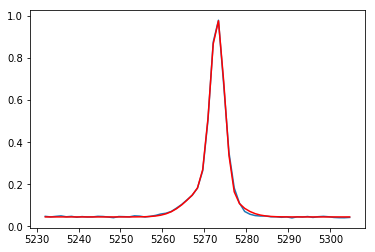

('w80 is', 405.26337)
('v5 is', 7.02)
59249.1
('velocity shift is', 83.439018)


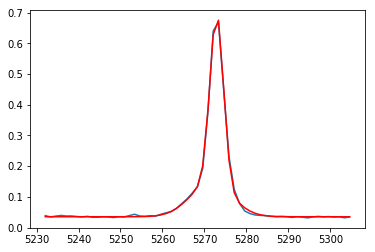

('w80 is', 405.2605)
('v5 is', 6.9200001)
59249.1
('velocity shift is', 74.283363)


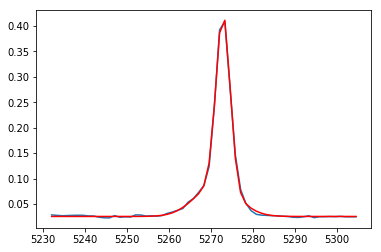

('w80 is', 405.27936)
('v5 is', 7.0999999)
59249.1
('velocity shift is', 86.924973)


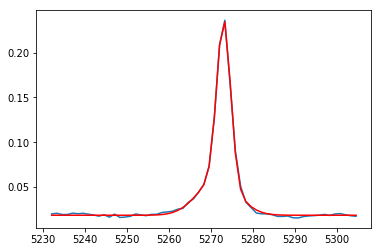

('w80 is', 404.17624)
('v5 is', 6.8000002)
59249.1
('velocity shift is', 79.657005)


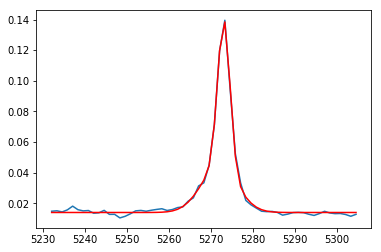

('w80 is', 412.79282)
('v5 is', 6.4400001)
59249.1
('velocity shift is', 61.660706)


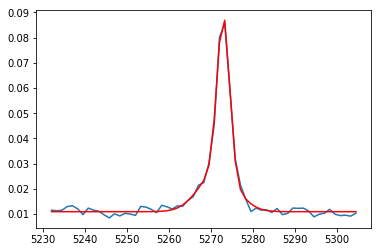

('w80 is', 403.09241)
('v5 is', 6.6199999)
59249.1
('velocity shift is', 74.480225)


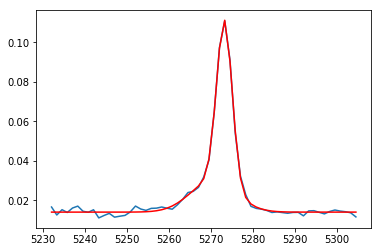

('w80 is', 468.02933)
('v5 is', 8.3400002)
59249.1
('velocity shift is', 146.65749)


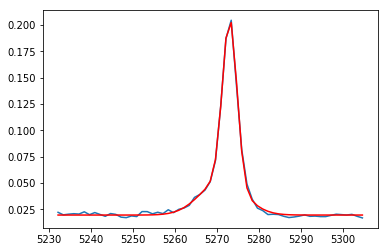

('w80 is', 444.19855)
('v5 is', 7.6399999)
59249.1
('velocity shift is', 98.611298)


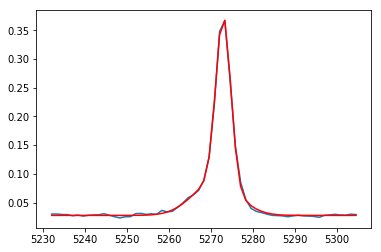

('w80 is', 449.60959)
('v5 is', 7.8000002)
59249.1
('velocity shift is', 102.75642)


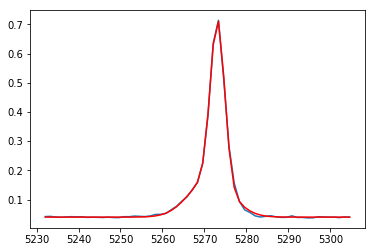

('w80 is', 440.93933)
('v5 is', 7.4200001)
59249.1
('velocity shift is', 94.463646)


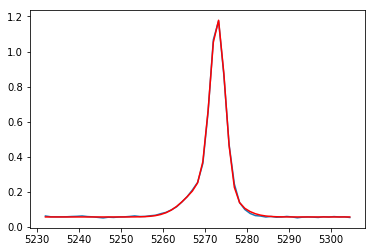

('w80 is', 431.23227)
('v5 is', 7.46)
59249.1
('velocity shift is', 107.06963)


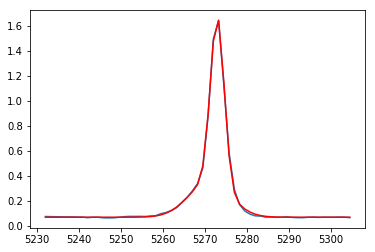

('w80 is', 429.07068)
('v5 is', 7.46)
59249.1
('velocity shift is', 103.61306)


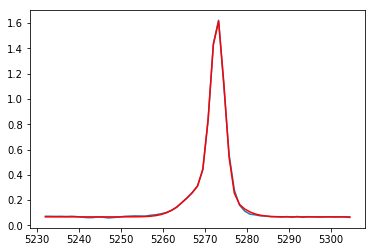

('w80 is', 426.9111)
('v5 is', 7.5)
59249.1
('velocity shift is', 106.47057)


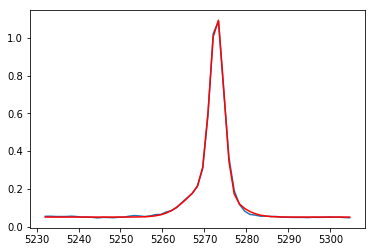

('w80 is', 424.73605)
('v5 is', 7.3800001)
59249.1
('velocity shift is', 91.209175)


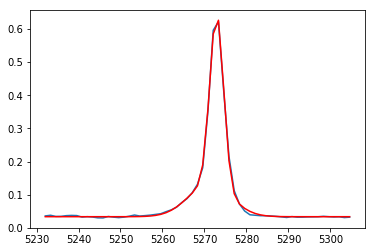

('w80 is', 419.33743)
('v5 is', 7.3600001)
59249.1
('velocity shift is', 93.089378)


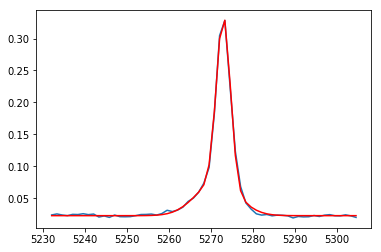

('w80 is', 413.91895)
('v5 is', 7.1599998)
59249.1
('velocity shift is', 87.040695)


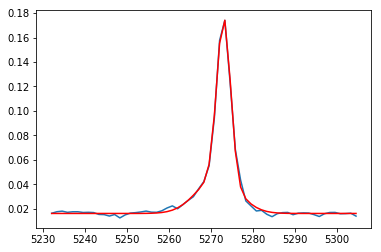

('w80 is', 424.71292)
('v5 is', 7.1599998)
59249.1
('velocity shift is', 81.938049)


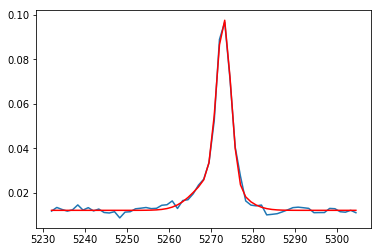

('w80 is', 420.40082)
('v5 is', 7.1799998)
59249.1
('velocity shift is', 91.094872)


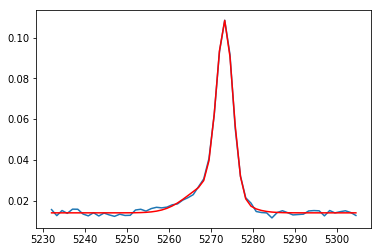

('w80 is', 474.56665)
('v5 is', 8.6800003)
59249.1
('velocity shift is', 181.85019)


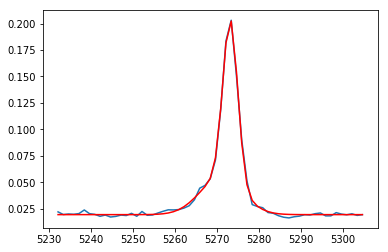

('w80 is', 450.707)
('v5 is', 7.7800002)
59249.1
('velocity shift is', 121.12518)


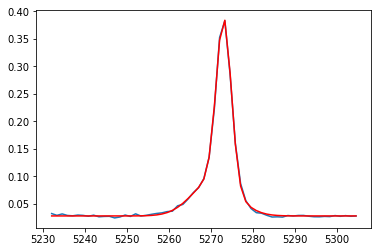

('w80 is', 456.11874)
('v5 is', 7.9200001)
59249.1
('velocity shift is', 124.0043)


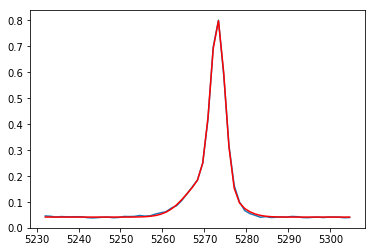

('w80 is', 458.26929)
('v5 is', 7.8400002)
59249.1
('velocity shift is', 122.55082)


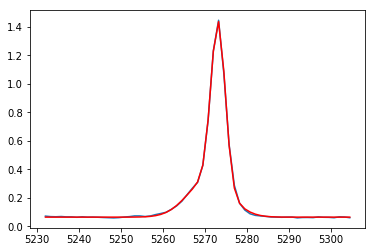

('w80 is', 451.78427)
('v5 is', 7.8400002)
59249.1
('velocity shift is', 124.24203)


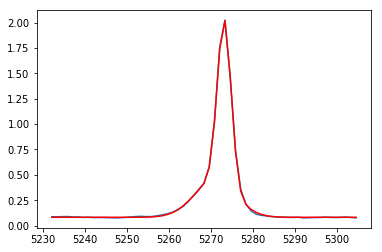

('w80 is', 446.38339)
('v5 is', 7.8000002)
59249.1
('velocity shift is', 123.31407)


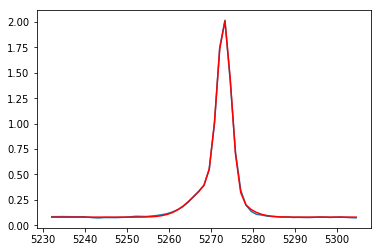

('w80 is', 443.14297)
('v5 is', 7.8600001)
59249.1
('velocity shift is', 123.36449)


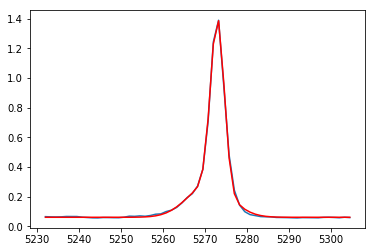

('w80 is', 435.56223)
('v5 is', 7.6999998)
59249.1
('velocity shift is', 108.98801)


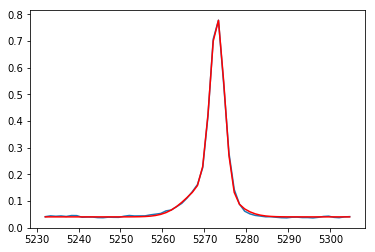

('w80 is', 429.07684)
('v5 is', 7.5599999)
59249.1
('velocity shift is', 107.57896)


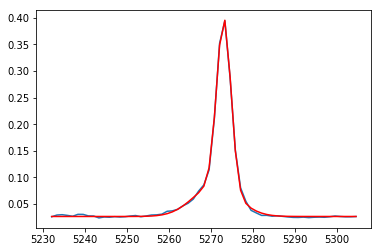

('w80 is', 436.6413)
('v5 is', 7.7600002)
59249.1
('velocity shift is', 110.56899)


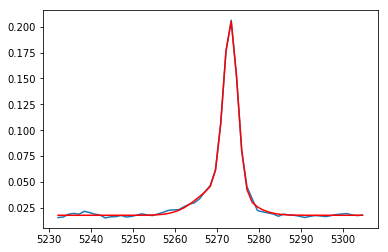

('w80 is', 448.53665)
('v5 is', 8.0600004)
59249.1
('velocity shift is', 118.15009)


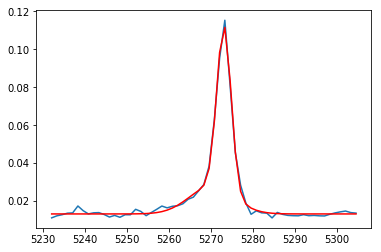

('w80 is', 460.49689)
('v5 is', 8.5200005)
59249.1
('velocity shift is', 160.56339)


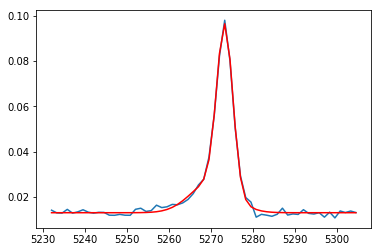

('w80 is', 449.6857)
('v5 is', 8.04)
59249.1
('velocity shift is', 171.55981)


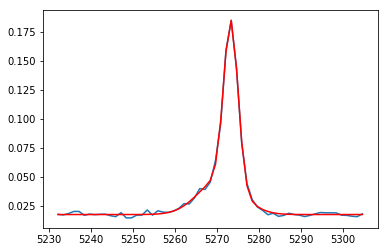

('w80 is', 469.10037)
('v5 is', 8.2799997)
59249.1
('velocity shift is', 139.90019)


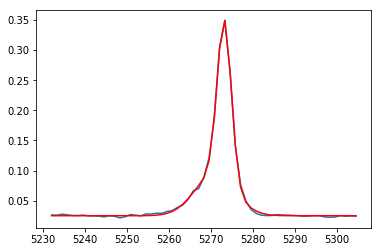

('w80 is', 447.46234)
('v5 is', 7.6199999)
59249.1
('velocity shift is', 124.24319)


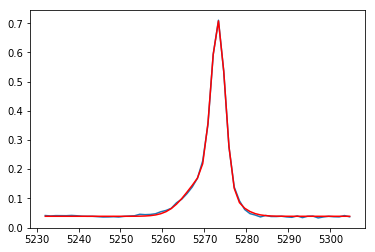

('w80 is', 459.35382)
('v5 is', 7.8600001)
59249.1
('velocity shift is', 129.38933)


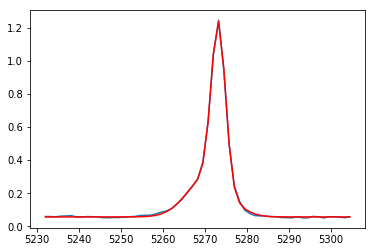

('w80 is', 463.68292)
('v5 is', 7.96)
59249.1
('velocity shift is', 133.29222)


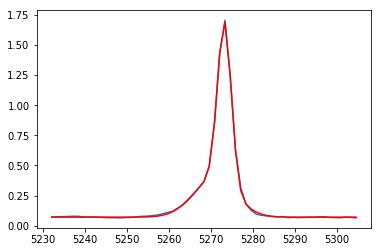

('w80 is', 466.93155)
('v5 is', 8.1199999)
59249.1
('velocity shift is', 133.25652)


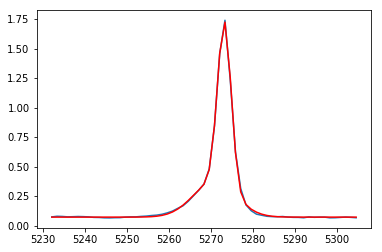

('w80 is', 461.52298)
('v5 is', 8.1199999)
59249.1
('velocity shift is', 129.70145)


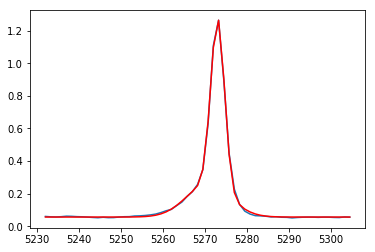

('w80 is', 452.87463)
('v5 is', 8.0799999)
59249.1
('velocity shift is', 125.02641)


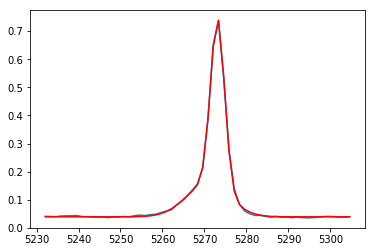

('w80 is', 448.55844)
('v5 is', 7.98)
59249.1
('velocity shift is', 130.01566)


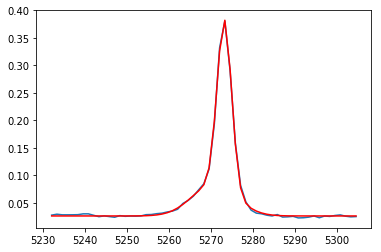

('w80 is', 451.79907)
('v5 is', 8.0799999)
59249.1
('velocity shift is', 133.85133)


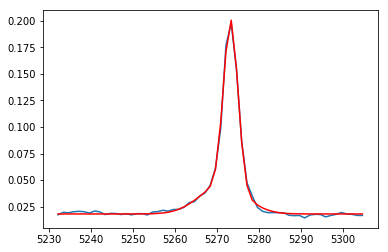

('w80 is', 440.95343)
('v5 is', 7.9000001)
59249.1
('velocity shift is', 109.50865)


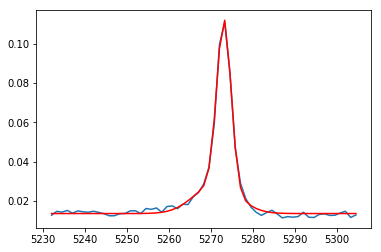

('w80 is', 417.17535)
('v5 is', 7.4400001)
59249.1
('velocity shift is', 105.52188)


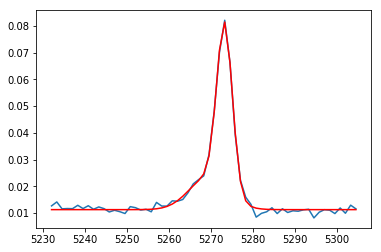

('w80 is', 457.31824)
('v5 is', 8.1599998)
59249.1
('velocity shift is', 210.1823)


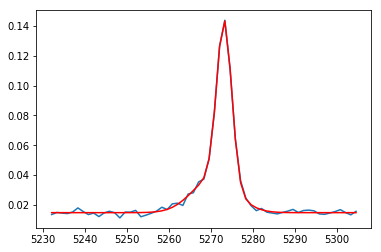

('w80 is', 459.36792)
('v5 is', 8.0200005)
59249.1
('velocity shift is', 133.87115)


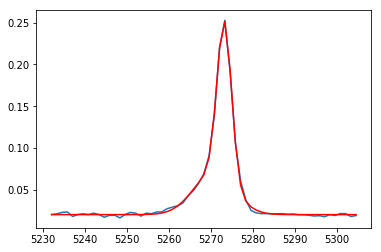

('w80 is', 463.69675)
('v5 is', 7.9200001)
59249.1
('velocity shift is', 138.4583)


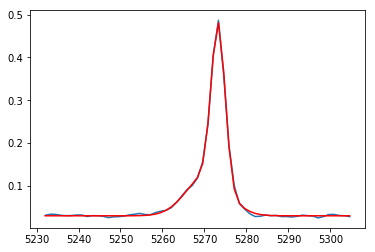

('w80 is', 472.35309)
('v5 is', 8.1800003)
59249.1
('velocity shift is', 147.10245)


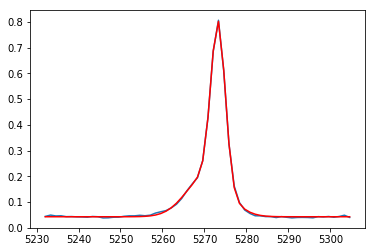

('w80 is', 469.10672)
('v5 is', 8.0600004)
59249.1
('velocity shift is', 143.58388)


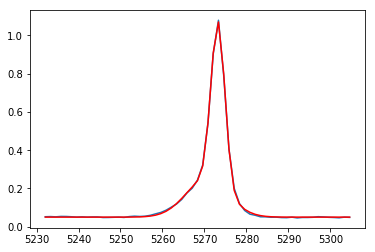

('w80 is', 474.51169)
('v5 is', 8.3000002)
59249.1
('velocity shift is', 142.60947)


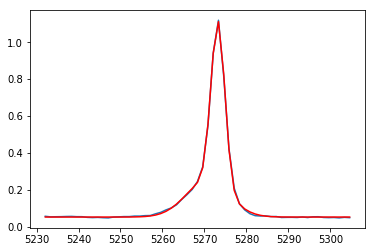

('w80 is', 472.34088)
('v5 is', 8.3000002)
59249.1
('velocity shift is', 136.91277)


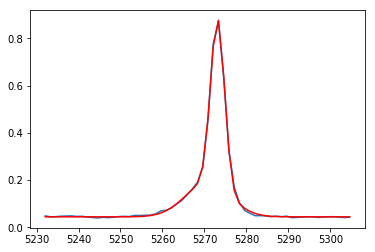

('w80 is', 471.2594)
('v5 is', 8.3599997)
59249.1
('velocity shift is', 131.60361)


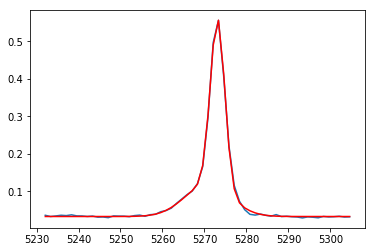

('w80 is', 468.01315)
('v5 is', 8.3599997)
59249.1
('velocity shift is', 129.15425)


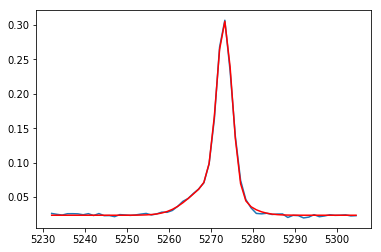

('w80 is', 464.77203)
('v5 is', 8.2600002)
59249.1
('velocity shift is', 135.49597)


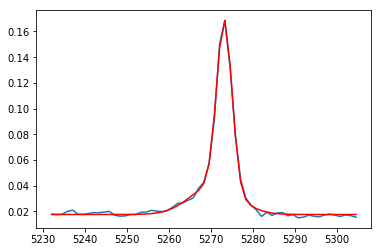

('w80 is', 464.76678)
('v5 is', 8.3800001)
59249.1
('velocity shift is', 131.98894)


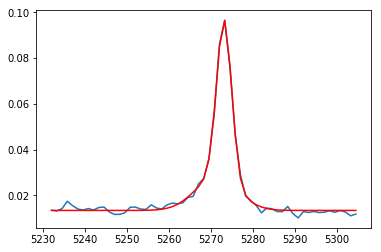

('w80 is', 425.81033)
('v5 is', 7.3200002)
59249.1
('velocity shift is', 100.31325)


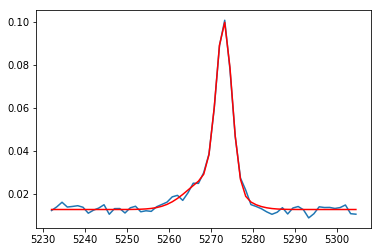

('w80 is', 499.41953)
('v5 is', 8.8999996)
59249.1
('velocity shift is', 166.9221)


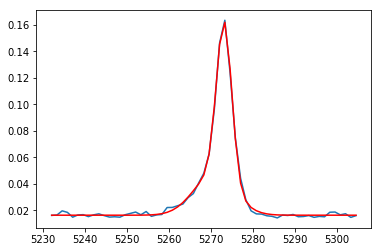

('w80 is', 453.96497)
('v5 is', 7.7199998)
59249.1
('velocity shift is', 133.82321)


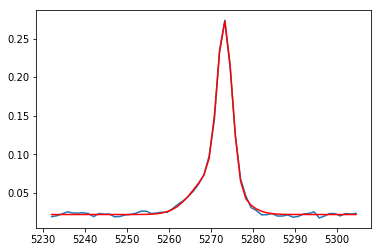

('w80 is', 467.99188)
('v5 is', 7.8800001)
59249.1
('velocity shift is', 125.5892)


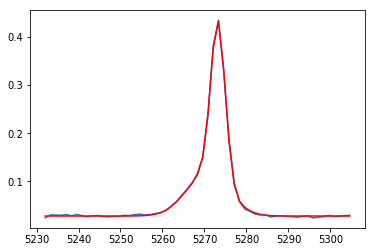

('w80 is', 478.82452)
('v5 is', 8.1199999)
59249.1
('velocity shift is', 136.32712)


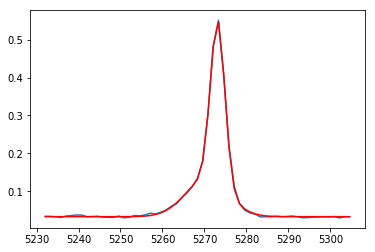

('w80 is', 472.35669)
('v5 is', 8.2399998)
59249.1
('velocity shift is', 142.88278)


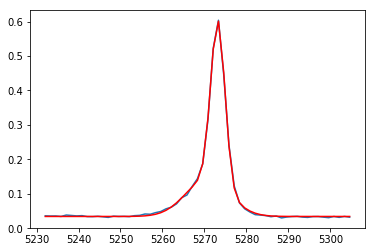

('w80 is', 477.74701)
('v5 is', 8.3400002)
59249.1
('velocity shift is', 136.42508)


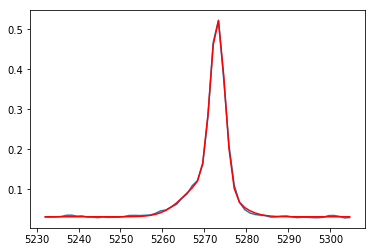

('w80 is', 483.1459)
('v5 is', 8.4200001)
59249.1
('velocity shift is', 129.26201)


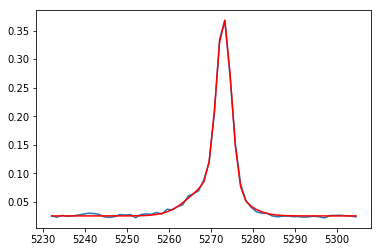

('w80 is', 477.73163)
('v5 is', 8.3999996)
59249.1
('velocity shift is', 121.76402)


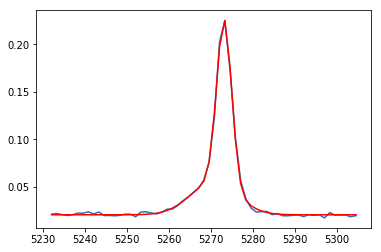

('w80 is', 478.82922)
('v5 is', 8.5200005)
59249.1
('velocity shift is', 136.95425)


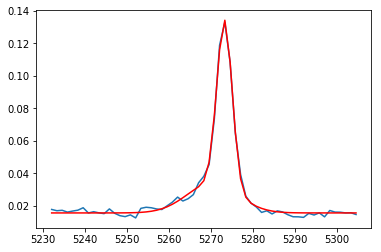

('w80 is', 523.17584)
('v5 is', 9.5)
59249.1
('velocity shift is', 157.7733)


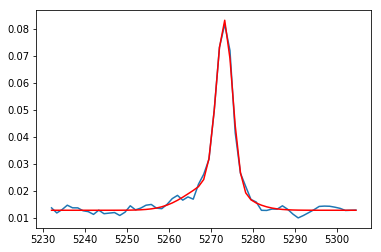

('w80 is', 495.0274)
('v5 is', 8.96)
59249.1
('velocity shift is', 132.24577)


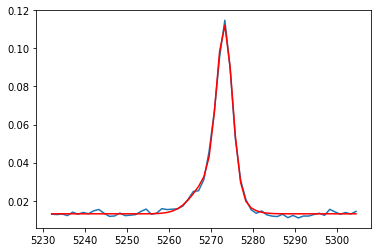

('w80 is', 409.63058)
('v5 is', 6.9000001)
59249.1
('velocity shift is', 126.33377)


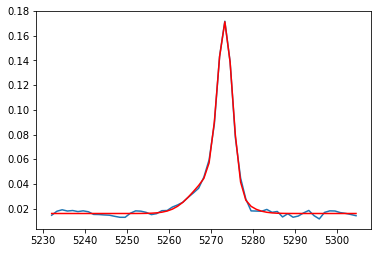

('w80 is', 447.47333)
('v5 is', 7.7600002)
59249.1
('velocity shift is', 140.00406)


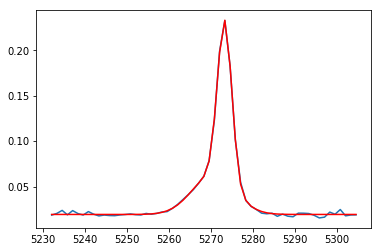

('w80 is', 482.07758)
('v5 is', 8.3599997)
59249.1
('velocity shift is', 145.93968)


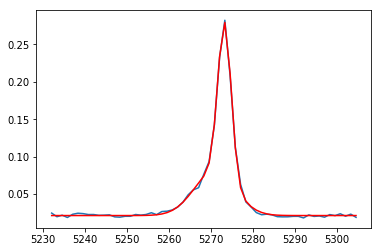

('w80 is', 478.80859)
('v5 is', 8.1199999)
59249.1
('velocity shift is', 129.26093)


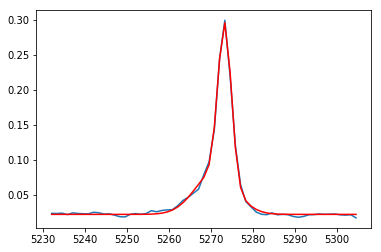

('w80 is', 461.50653)
('v5 is', 7.8400002)
59249.1
('velocity shift is', 125.17583)


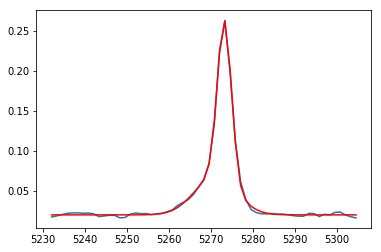

('w80 is', 452.85632)
('v5 is', 7.7800002)
59249.1
('velocity shift is', 120.1834)


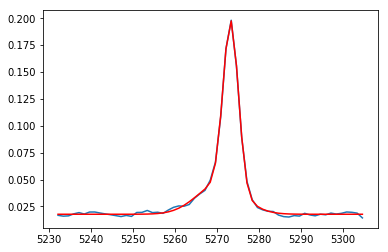

('w80 is', 463.7052)
('v5 is', 8.3400002)
59249.1
('velocity shift is', 144.34067)


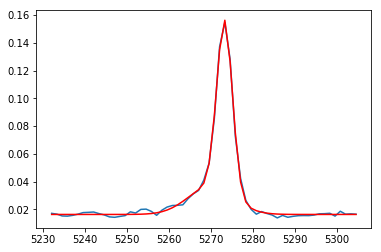

('w80 is', 469.16199)
('v5 is', 8.6400003)
59249.1
('velocity shift is', 178.84781)


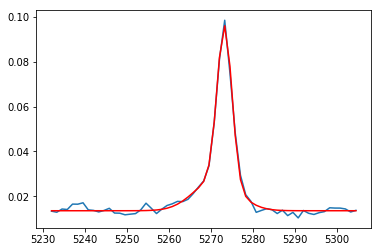

('w80 is', 439.8725)
('v5 is', 7.7199998)
59249.1
('velocity shift is', 113.79399)


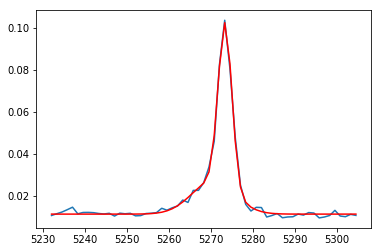

('w80 is', 471.27328)
('v5 is', 8.4799995)
59249.1
('velocity shift is', 155.69402)


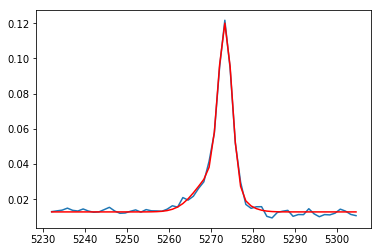

('w80 is', 417.18829)
('v5 is', 7.2399998)
59249.1
('velocity shift is', 127.73583)


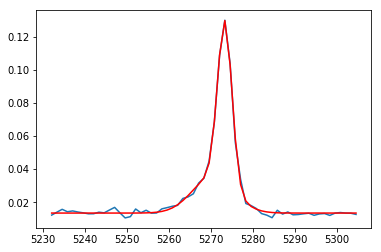

('w80 is', 460.46872)
('v5 is', 8.1199999)
59249.1
('velocity shift is', 153.34331)


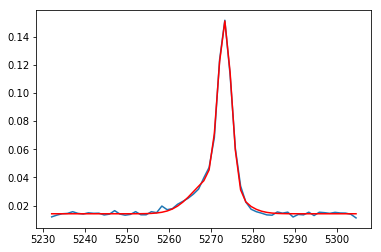

('w80 is', 463.68839)
('v5 is', 8.1800003)
59249.1
('velocity shift is', 138.66933)


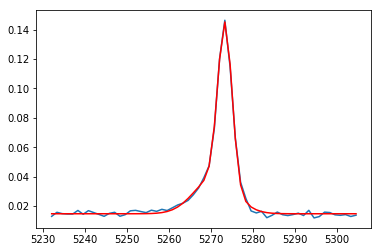

('w80 is', 439.90439)
('v5 is', 7.6999998)
59249.1
('velocity shift is', 138.00266)


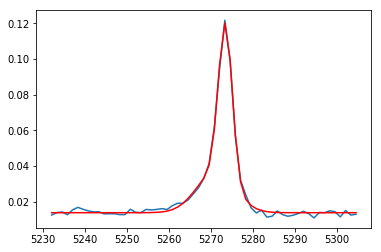

('w80 is', 432.31384)
('v5 is', 7.4000001)
59249.1
('velocity shift is', 127.24734)


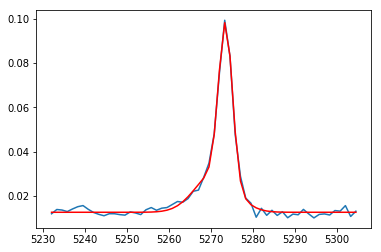

('w80 is', 450.69757)
('v5 is', 7.8200002)
59249.1
('velocity shift is', 137.80913)


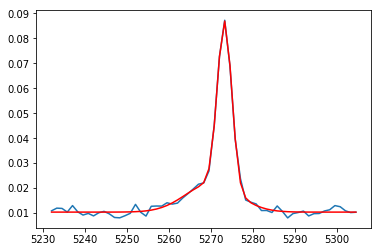

('w80 is', 545.89087)
('v5 is', 10.06)
59249.1
('velocity shift is', 167.59384)


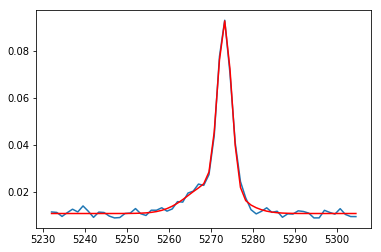

('w80 is', 510.19437)
('v5 is', 9.3000002)
59249.1
('velocity shift is', 154.3746)


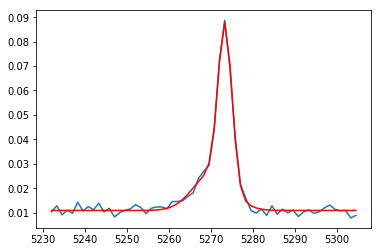

('w80 is', 443.18469)
('v5 is', 7.8200002)
59249.1
('velocity shift is', 164.49109)


In [861]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
for i in range(mini_data.shape[1]):
    for j in range(mini_data.shape[2]):
        spectrum = mini_data[:,i,j]
        wave = np.arange(wavstart,(wavstart+(wavint*mini_data.shape[0])),wavint)
        select = (wave > 4967*k) & (wave < 5037*k) 
        select1 = (spectrum> 0.08)
        n = len(wave[select])
        mean = sum(wave[select]*spectrum[select])/n
        sigma = sum(spectrum[select]*(wave[select]-mean)**2)/n
        def gaus(wave, amp1, cent1, sigma1,c):
                return amp1*exp(-(wave-cent1)**2/(2*sigma1**2)) +  c
        def gaus2(wave, amp1, amp2, cent1, cent2, sigma1, sigma2, c):
                return amp1*exp(-(wave-cent1)**2/(2*sigma1**2)) + amp2*exp(-(wave-cent2)**2/(2*sigma2**2)) + c
        def gaus2_wo(wave, amp1, amp2, cent1, cent2, sigma1, sigma2):
                return amp1*exp(-(wave-cent1)**2/(2*sigma1**2)) + amp2*exp(-(wave-cent2)**2/(2*sigma2**2))  
        #print mean, sig
        if spectrum[select1].any() > 0.08:
                popt2,pcov2 = curve_fit(gaus2,wave[select],spectrum[select],p0=[1.0,1.0,5007*k,5007*k,1.0,10.0,0.01], maxfev =100000000)
                plt.plot(wave[select],spectrum[select])
                plt.plot(wave[select],gaus2(wave[select],*popt2),'r-',label='fit')
                plt.show()
                cor_popt2 = np.array(popt2)
                cor_popt2[4] = np.sqrt(np.abs(cor_popt2[4]**2-(2.5/2.354)**2))
                cor_popt2[5] = np.sqrt(np.abs(cor_popt2[5]**2-(2.5/2.354)**2))
                wave = np.arange(5200,5400,0.02)
                cumsum = np.cumsum(gaus2_wo(wave,*cor_popt2[:-1]))
                norm_sum=cumsum/cumsum[-1]
                select = (norm_sum>0.1) & (norm_sum<0.9)
                try:
                    w80_spec = wave[select][-1]- wave[select][0]
                except IndexError:
                    continue
                w80_spec = wave[select][-1]- wave[select][0]
                w80_actual = ((w80_spec)/cor_popt2[3])*(c/(1+z))
                w80[i,j]= w80_actual/100000
                print ('w80 is',w80[i,j])
                #plt.plot(wave[select],norm_sum[select],'-k')
                #plt.show()
                select =  (norm_sum>0.05) & (norm_sum<0.5)
                #try:
                #    v5_spec = wave[select][-1]- wave[select][0]
                #except IndexError:
                #print wave[select]
                #    continue
                v5_spec = wave[select][-1]-wave[select][0]
                v5[i,j]= v5_spec
                print ('v5 is',v5[i,j])
                print np.sum(w80)
                #plt.legend
                F_total = (2.507*(cor_popt2[0]*cor_popt2[4]) + 2.507*(cor_popt2[1]*cor_popt2[5]))*(10**-16)
                flux_total[i,j] =  F_total
                F_narrow = 2.507*(cor_popt2[0]*cor_popt2[4])*(10**-16)
                F_broad = 2.507*(cor_popt2[1]*cor_popt2[5])*(10**-16)
                velshift_angstrom = (cor_popt2[2]-cor_popt2[3])
                #print cor_popt2[3]
                velshift_actual = (velshift_angstrom)/(cor_popt2[3])*(c/(1+z)) 
                vel_diff[i,j] = velshift_actual/100000 
                print('velocity shift is', vel_diff[i,j])
                                                              
        else:
             exit

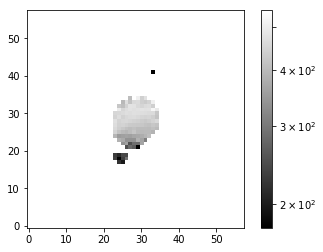

In [850]:
from matplotlib.colors import LogNorm
from matplotlib import cm
cmap=cm.gray
plt.imshow(w80,origin='lower',interpolation='nearest', cmap='gray', norm=LogNorm())
cbar = plt.colorbar()
plt.show()

#plt.savefig('w80_fig.png',format='png')

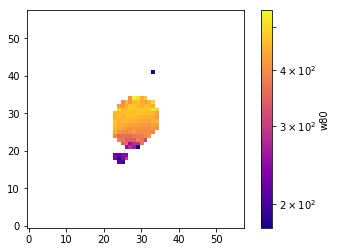

In [851]:
fig = plt.figure()

cmap = cm.plasma
cmap.set_bad('white',1)

frame = plt.imshow(w80, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='nearest')
cbar = plt.colorbar()
cbar.set_label(r"w80")

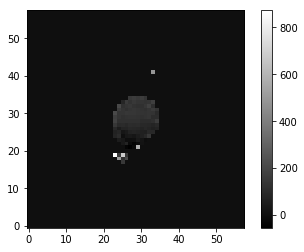

In [852]:
plt.imshow(vel_diff,origin='lower',interpolation='nearest',cmap='gray')
cbar = plt.colorbar()
cmap.set_bad('white',1)
plt.show()

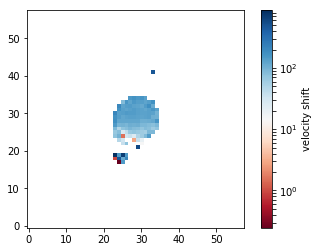

In [853]:
fig = plt.figure()

cmap = cm.RdBu
cmap.set_bad('white',1)

frame = plt.imshow(vel_diff, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='nearest')
cbar = plt.colorbar()
cbar.set_label(r"velocity shift")

In [854]:
w80_hdu = fits.PrimaryHDU(data=w80)
w80_hdu.writeto('w80_myfit.fits',clobber=True)

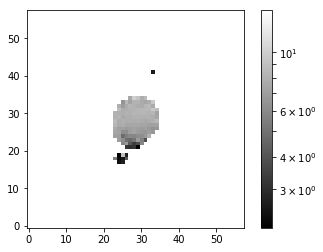

In [855]:
plt.imshow(v5,origin='lower',interpolation='nearest',cmap='gray', norm=LogNorm())
cbar = plt.colorbar()
plt.show()

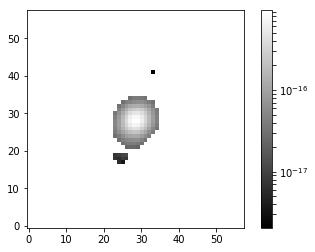

In [856]:
plt.imshow(flux_total,origin='lower',interpolation='nearest',cmap='gray',norm=LogNorm())
cbar = plt.colorbar()
plt.show()

In [857]:
vel_diff_hdu = fits.PrimaryHDU(data=vel_diff)
vel_diff_hdu.writeto('vel_diff_myfit.fits',clobber=True)

In [858]:
flux_total_hdu = fits.PrimaryHDU(data=flux_total)
flux_total_hdu.writeto('flux_total_myfit.fits',clobber=True)

In [859]:
Flux= np.sum(flux_total)
Flux

2.3815588e-14

In [769]:
D_L = 7.31*(10**26)

In [770]:
L_total = 31.5*((D_L)**2)*(Flux)/(2.507)
L_total

1.5990140802045305e+41

In [786]:
velocity_shift = velshift_actual/100000
velocity_shift

164.49108129569669

In [787]:
v5_final = v5_spec
v5_final

7.820000000170694

In [814]:
np.median(w80)

0.0

In [790]:
velocity_dispersion = w80_final/3.29
velocity_dispersion

134.70658996321382

In [794]:
from scipy import math
math.log10(L_total)

41.203852287966505

In [843]:
np.max(w80)

545.89087